In [ ]:
'''
// build a montecarlo simulation
// 1. generate a random number
// 2. calculate the value of the function at that point
// 3. repeat 1 and 2 a large number of times
// 4. calculate the average value of the function
// 5. multiply the average value by the area of the box
// 6. the result is an approximation of the integral
// 7. repeat 5 and 6 a large number of times
// 8. calculate the average value of the integral
// 9. the result is an approximation of the integral
// 10. the error is the standard deviation of the integral
// 11. the error is the standard deviation of the integral divided by the square root of the number of trials
// 12. the error is the standard deviation of the integral divided by the square root of the number of trials times the area of the box
// 13. the error is the standard deviation of the integral divided by the square root of the number of trials times the area of the box times the average value of the function
// 14. the error is the standard deviation of the integral divided by the square root of the number of trials times the area of the box times the average value of the function times the average value of the function
// 15. the error is the standard deviation of the integral divided by the square root of the number of trials times the area of the box times the average value of the function squared
'''

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_csv("historical_data.csv", index_col=0, parse_dates=True)
data

,USDCHFopen,USDCHFhigh,USDCHFlow,USDCHFclose,USDEURopen,USDEURhigh,USDEURlow,USDEURclose,USDGBPopen,USDGBPhigh,...,USDJPYlow,USDJPYclose,USDCNYopen,USDCNYhigh,USDCNYlow,USDCNYclose,USDGDopen,USDGDhigh,USDGDlow,USDGDclose
2017-01-03 00:00:00+00:00,1.02410,1.03324,1.02110,1.02419,0.95610,0.96640,0.953100,0.95602,0.81420,0.819400,...,117.286003,117.495003,6.9440,6.9604,6.9350,6.9440,1.44989,1.45420,1.44580,1.45130
2017-01-04 00:00:00+00:00,1.02622,1.02905,1.02356,1.02610,0.95984,0.96234,0.954300,0.95970,0.81659,0.818100,...,117.068001,117.658997,6.9599,6.9601,6.9343,6.9598,1.44875,1.45054,1.43860,1.44875
2017-01-05 00:00:00+00:00,1.02006,1.02190,1.00951,1.02012,0.95250,0.95360,0.942600,0.95230,0.81116,0.814900,...,115.292999,117.112999,6.9341,6.9341,6.8605,6.9251,1.43849,1.44050,1.42793,1.43848
2017-01-06 00:00:00+00:00,1.00990,1.01665,1.00977,1.00979,0.94290,0.94880,0.942600,0.94287,0.80490,0.812800,...,115.263000,115.264999,6.8880,6.9255,6.8741,6.8879,1.42879,1.43833,1.42820,1.42846
2017-01-09 00:00:00+00:00,1.01740,1.01960,1.01570,1.01742,0.94930,0.95116,0.946900,0.94950,0.81568,0.824600,...,116.182999,117.150002,6.9176,6.9370,6.9107,6.9175,1.43910,1.44362,1.43600,1.43897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 00:00:00+01:00,0.91502,0.92212,0.91360,0.91502,0.92532,0.92558,0.921744,0.92532,0.81319,0.814200,...,130.445999,131.233002,6.8844,6.8866,6.8712,6.8844,1.33063,1.33074,1.32670,1.33063
2023-03-29 00:00:00+01:00,0.92040,0.92210,0.91664,0.92040,0.92255,0.92410,0.919794,0.92255,0.81062,0.812678,...,130.927994,131.046005,6.8733,6.8918,6.8730,6.8733,1.32740,1.33076,1.32680,1.32740
2023-03-30 00:00:00+01:00,0.91810,0.91996,0.91267,0.91810,0.92220,0.92362,0.915420,0.92220,0.81227,0.813310,...,132.222000,132.576004,6.8856,6.9067,6.8707,6.8856,1.32923,1.33124,1.32700,1.32923
2023-03-31 00:00:00+01:00,0.91338,0.91770,0.91173,0.91338,0.91704,0.92076,0.915260,0.91704,0.80728,0.810040,...,132.725998,133.201004,6.8704,6.8757,6.8416,6.8704,1.32793,1.33036,1.32546,1.32793


In [4]:
data['USDTALclose'] = (1/data['USDCHFclose'])*100 + (1/data['USDEURclose'])*250 + (1/data['USDGBPclose'])*50 + (1/data['USDJPYclose'])*18000 + (1/data['USDCNYclose'])*1600 + (1/data['USDGDclose']*80)

In [5]:
data['USDTALclose'] = data['USDTALclose']*0.001

In [6]:
data['USDTALclose']

2017-01-03 00:00:00+00:00    0.859285
2017-01-04 00:00:00+00:00    0.857279
2017-01-05 00:00:00+00:00    0.862540
2017-01-06 00:00:00+00:00    0.870763
2017-01-09 00:00:00+00:00    0.863431
                               ...   
2023-03-28 00:00:00+01:00    0.870644
2023-03-29 00:00:00+01:00    0.871698
2023-03-30 00:00:00+01:00    0.869905
2023-03-31 00:00:00+01:00    0.872297
2023-04-03 00:00:00+01:00    0.868434
Name: USDTALclose, Length: 1627, dtype: float64

In [7]:
currency_columns = [col for col in data.columns if col.endswith("close")]
returns = data[currency_columns].pct_change().dropna()
#Tal = [col for col in returns.columns if col.endswith("TALclose")]
#currency_columns.remove('USDTALclose')
#take out USDTALclose from data
#returnsTAL = pd.DataFrame(returns, columns = ['USDTALclose'])
#returns = returns.drop(columns=['USDTALclose'])


In [8]:
def monte_carlo_simulation(returns, num_simulations, num_days):
    # Get the number of currencies and initialize the results array
    num_currencies = len(returns.columns)
    results = np.zeros((num_simulations, num_days, num_currencies))

    for sim in range(num_simulations):
        # Generate random daily returns
        random_returns = returns.sample(n=num_days, replace=True).values

        # Simulate the price path for each currency
        for curr_idx in range(num_currencies):
            initial_price = 1
            prices = [initial_price]

            for day in range(1, num_days):
                price = prices[-1] * (1 + random_returns[day, curr_idx])
                prices.append(price)

            results[sim, :, curr_idx] = prices

    return results


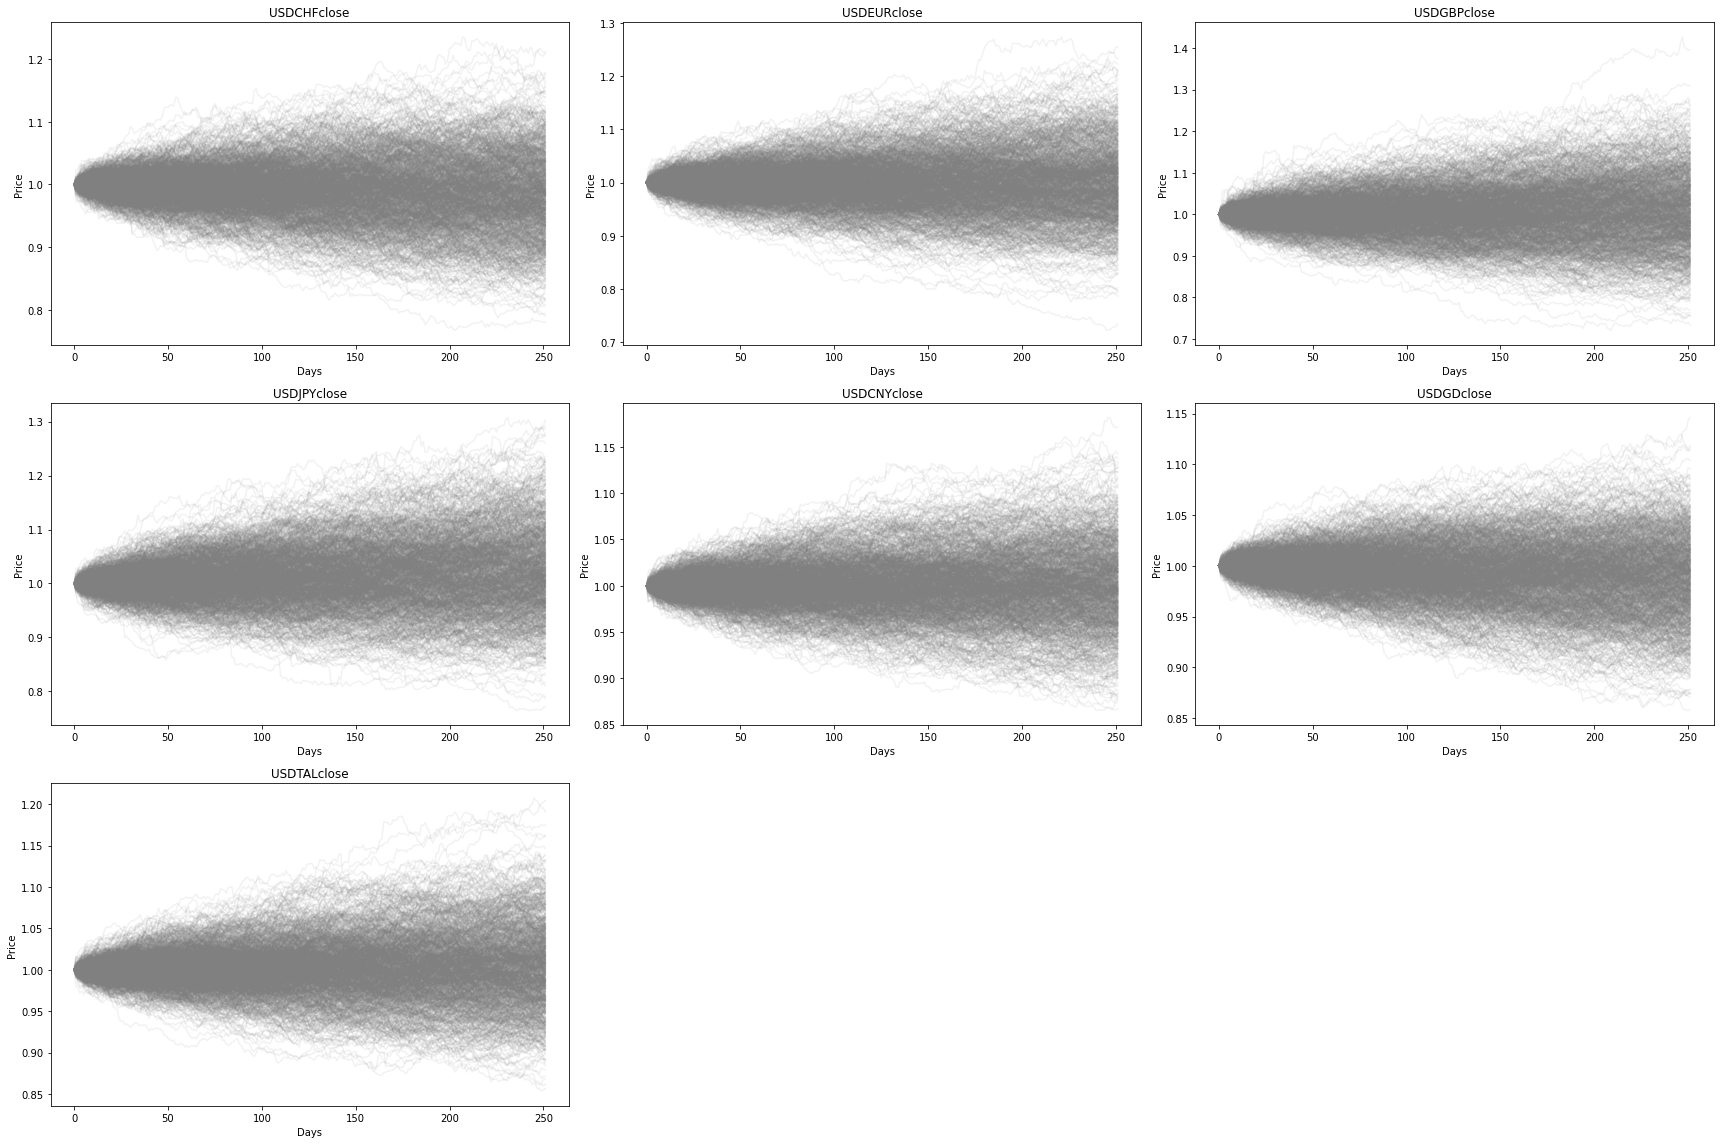

In [9]:
num_simulations = 1000
num_days = 252  # Number of trading days in a year

results = monte_carlo_simulation(returns, num_simulations, num_days)

# Plot the results
plt.figure(figsize=(24, 16))  # Increase the figure size to fit the new currency

for curr_idx, curr_name in enumerate(currency_columns):
    plt.subplot(3, 3, curr_idx + 1)  # Update the subplot layout
    plt.title(curr_name)

    for sim in range(num_simulations):
        plt.plot(results[sim, :, curr_idx], color='grey', alpha=0.1)

    plt.xlabel('Days')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


      Currency      Mean    Median  Standard Deviation  5th Percentile  \
0  USDCHFclose  0.981415  0.982155            0.069079        0.872051   
1  USDEURclose  0.995551  0.990270            0.073854        0.879429   
2  USDGBPclose  1.003689  1.000108            0.093504        0.856056   
3  USDJPYclose  1.021617  1.015668            0.083971        0.888121   
4  USDCNYclose  0.998806  0.996506            0.047184        0.923743   
5   USDGDclose  0.985815  0.986960            0.043088        0.913534   
6  USDTALclose  1.004771  1.004096            0.051953        0.923075   

   95th Percentile  
0         1.095162  
1         1.121048  
2         1.160365  
3         1.169508  
4         1.079870  
5         1.053118  
6         1.093997  


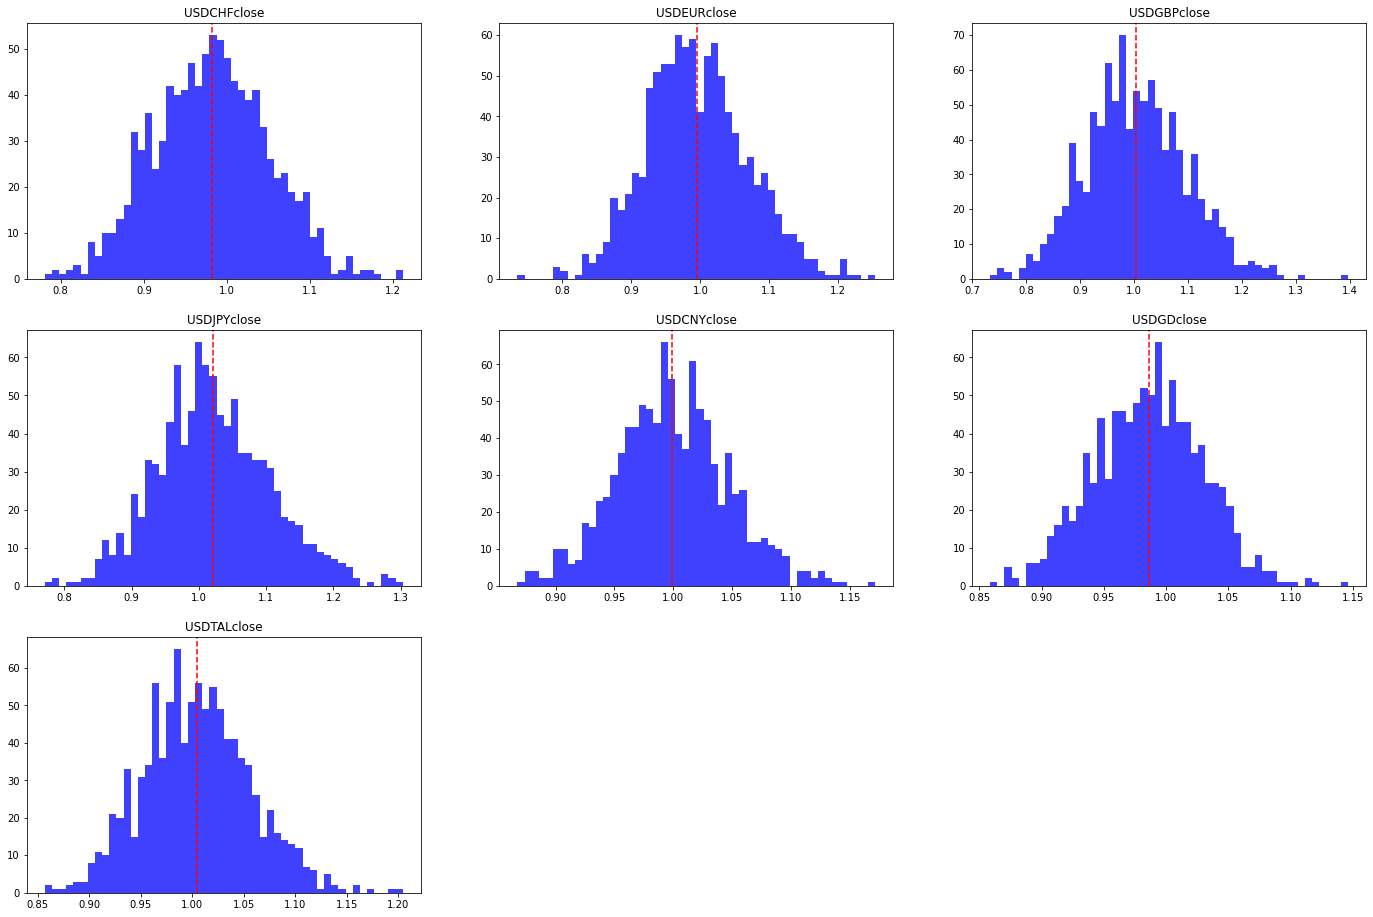

In [10]:
# Calculate the ending prices of each simulation
ending_prices = results[:, -1, :]

# Calculate summary statistics for each currency
mean_ending_prices = np.mean(ending_prices, axis=0)
median_ending_prices = np.median(ending_prices, axis=0)
std_ending_prices = np.std(ending_prices, axis=0)

# Calculate the 5th and 95th percentiles for each currency
percentiles = np.percentile(ending_prices, [5, 95], axis=0)

# Display the summary statistics
summary_statistics = pd.DataFrame({
    'Currency': currency_columns,
    'Mean': mean_ending_prices,
    'Median': median_ending_prices,
    'Standard Deviation': std_ending_prices,
    '5th Percentile': percentiles[0],
    '95th Percentile': percentiles[1],
})

print(summary_statistics)

# Plot the histograms
plt.figure(figsize=(24, 16))  # Increase the figure size to fit the new currency

for curr_idx, curr_name in enumerate(currency_columns):
    plt.subplot(3, 3, curr_idx + 1)  # Update the subplot layout
    plt.title(curr_name)
    plt.hist(ending_prices[:, curr_idx], bins=50, alpha=0.75, color='blue')
    plt.axvline(mean_ending_prices[curr_idx], color='red', linestyle='--', label='Mean')
    plt


In [200]:
stdTAL = returns['USDTALclose'].std()
print('Standard Deviation of TAL is: ', stdTAL)

Standard Deviation of TAL is:  0.0032045362724098204


In [201]:
# Set the VaR parameters
confidence_level = 0.95
time_horizon = 1  # 1-day VaR

# Calculate the VaR
TAL_var = -norm.ppf(1 - confidence_level) * stdTAL * np.sqrt(time_horizon)
print(f"{round(100 * (1 - confidence_level),5)}% 1-day VaR:", TAL_var)

5.0% 1-day VaR: 0.005270993110370844


In [202]:
def value_at_risk(std, confidence_level, time_horizon):
    return -norm.ppf(1 - confidence_level) * std * np.sqrt(time_horizon)

In [203]:
def expected_shortfall(returns, confidence_level=0.95):
    # Calculate the VaR
    var = -returns.quantile(1 - confidence_level)
    
    # Calculate the Expected Shortfall
    es = -returns[returns < -var].mean()
    
    return es


In [204]:
TAL_es = expected_shortfall(returns['USDTALclose'], confidence_level)
print(f"Expected Shortfall at {confidence_level * 100}% confidence level:", TAL_es)


Expected Shortfall at 95.0% confidence level: 0.006835998930915997


In [205]:
ES = []
for i in currency_columns:
    ES.append(expected_shortfall(returns[i]))

VAR = []
for i in currency_columns:
    VAR.append(value_at_risk(returns[i].std(), confidence_level, time_horizon))

In [206]:
summary_statistics['VaR'] = VAR
summary_statistics['ES'] = ES

In [207]:
summary_statistics

,Currency,Mean,Median,Standard Deviation,5th Percentile,95th Percentile,VaR,ES
0,USDCHFclose,0.985994,0.983542,0.068242,0.873826,1.102443,0.007415,0.010185
1,USDEURclose,1.000850,0.997358,0.071313,0.886822,1.117197,0.007568,0.010080
2,USDGBPclose,1.008462,1.001755,0.095464,0.866393,1.178360,0.009729,0.013338
3,USDJPYclose,1.020061,1.015656,0.083967,0.884686,1.160444,0.008494,0.012032
4,USDCNYclose,1.002286,1.001991,0.047118,0.927459,1.083387,0.004833,0.007128
5,USDGDclose,0.990814,0.989776,0.042557,0.921137,1.061555,0.004539,0.006174
6,USDTALclose,1.001109,1.000076,0.050547,0.919788,1.084388,0.005271,0.006836


In [110]:
summary_statistics.to_csv('montecarlo_statistics.csv')

In [211]:
data = summary_statistics
data = data[0:].set_index(data.columns[0])

In [209]:
colors = {
    'USDCHFclose': 'blue',
    'USDEURclose': 'orange',
    'USDGBPclose': 'green',
    'USDJPYclose': 'red',
    'USDCNYclose': 'purple',
    'USDGDclose': 'brown',
    'USDTALclose': 'magenta',
}

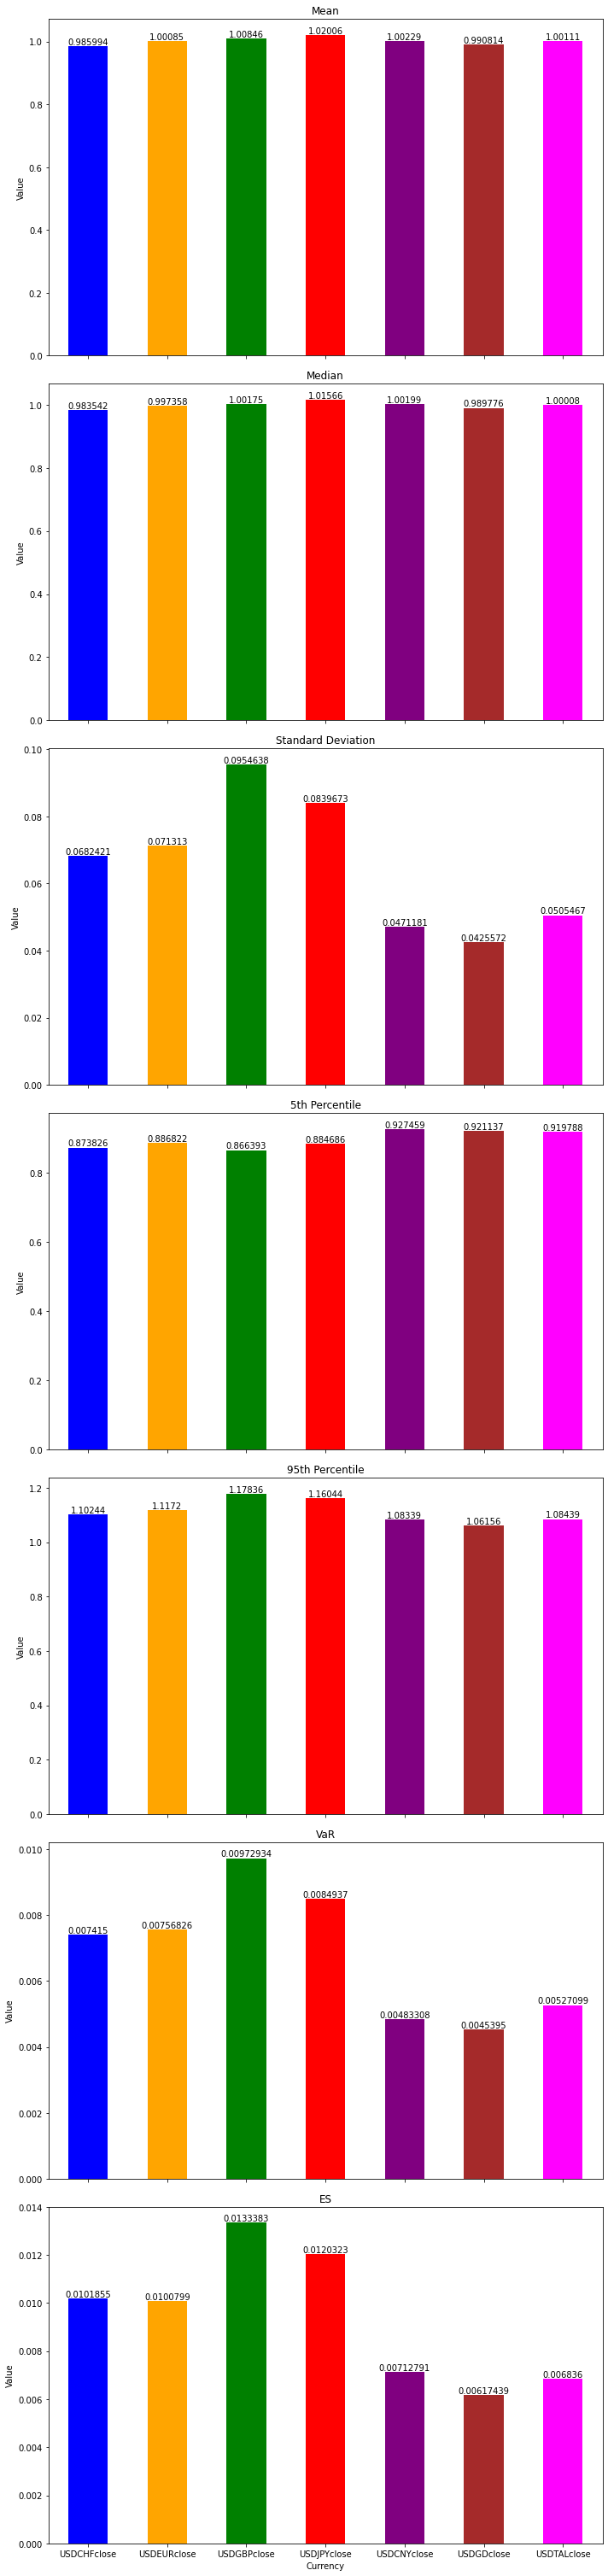

In [212]:
n_subplots = len(data.columns)

# Create subplots
fig, axes = plt.subplots(n_subplots, 1, figsize=(10, 6 * n_subplots), sharex=True)
axes = axes.flatten()

# Iterate through each component and create a bar chart
for idx, component in enumerate(data.columns):
    ax = axes[idx]
    
    data[component].plot.bar(ax=ax, rot=0, color=[colors[currency] for currency in data.index])
    ax.bar_label(ax.containers[0], label_type='edge', color='black')
    
    ax.set_title(f'{component}')
    ax.set_xlabel('Currency')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


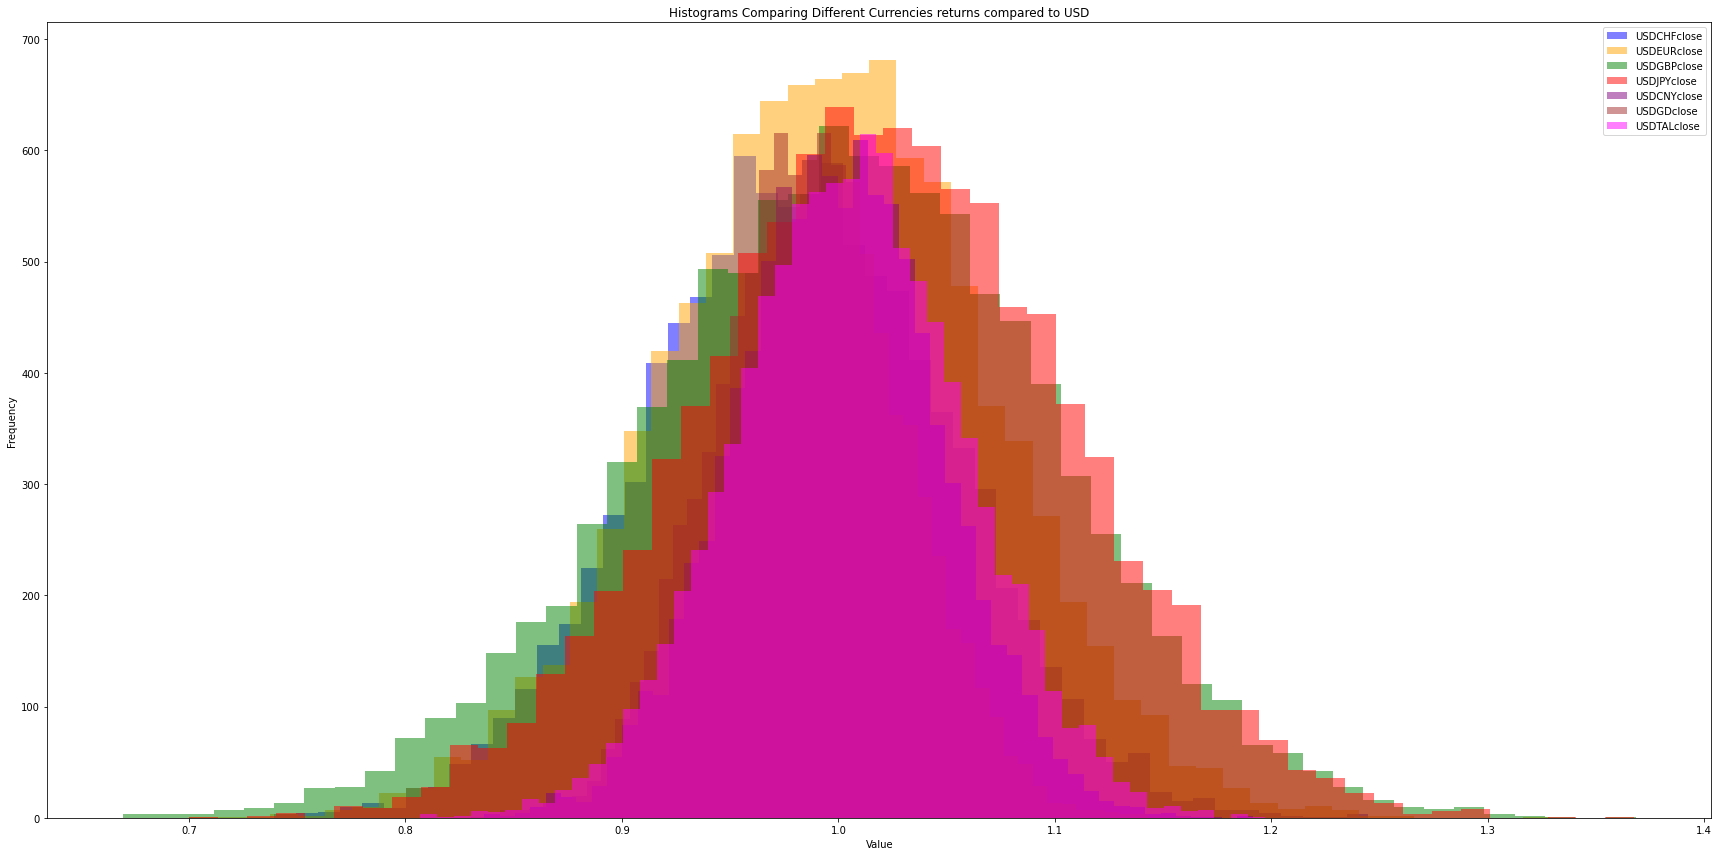

In [11]:
df = summary_statistics
fig, ax = plt.subplots(figsize=(24, 12))

# Define colors for each currency
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'magenta']

for idx, currency in enumerate(df['Currency']):
    mean = df.loc[df['Currency'] == currency, 'Mean'].values[0]
    std_dev = df.loc[df['Currency'] == currency, 'Standard Deviation'].values[0]

    # Generate random samples from a normal distribution with the given mean and standard deviation
    samples = np.random.normal(mean, std_dev, 10000)
    
    # Plot the histogram with a slightly transparent color to see overlaps
    ax.hist(samples, bins=50, alpha=0.5, color=colors[idx], label=currency)

ax.set_title('Histograms Comparing Different Currencies returns compared to USD')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()
